# Classifying Student Based on Fuzzy Logic

## Pre-processing and Exploring Data

In [2]:
# Import necessary libraries
import pandas as pd

df = pd.read_csv('data.csv', delimiter=';')

print("DataFrame Info:")
print(df.info())
print("\nFirst 5 rows:")
display(df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Descriptive statistics for numerical features
print("Descriptive statistics:")
display(df.describe())

# Distribution of target classes
print("\nTarget value counts:")
print(df['Target'].value_counts())


Descriptive statistics:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000



Target value counts:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


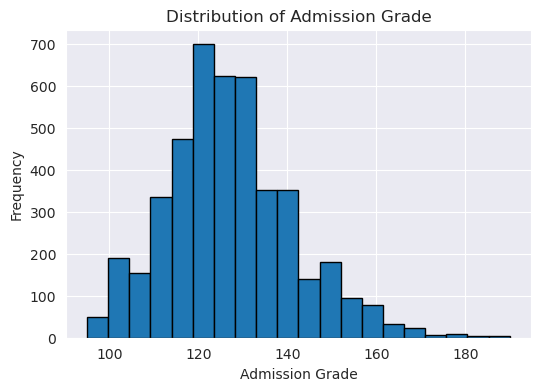

In [4]:
import matplotlib.pyplot as plt

# Histogram of Admission grade
plt.figure(figsize=(6,4))
plt.hist(df['Admission grade'], bins=20, edgecolor='black')
plt.title('Distribution of Admission Grade')
plt.xlabel('Admission Grade')
plt.ylabel('Frequency')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split with stratification to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size:     {X_test.shape[0]} samples")

Training set size: 3539 samples
Test set size:     885 samples


In [6]:
import numpy as np

def triangular_mf(x: np.ndarray, a: float, b: float, c: float) -> np.ndarray:
    """
    Triangular membership function.
    a: left foot (membership = 0 for x <= a)
    b: peak (membership = 1 at x = b)
    c: right foot (membership = 0 for x >= c)
    """
    # Initialize membership values
    left = np.zeros_like(x, dtype=float)
    right = np.zeros_like(x, dtype=float)

    # Compute rising edge (left side of triangle)
    if b != a:
        left = (x - a) / (b - a)
    else:
        # If a == b, the left slope is vertical
        left = np.where(x == b, 1.0, 0.0)

    # Compute falling edge (right side of triangle)
    if c != b:
        right = (c - x) / (c - b)
    else:
        # If b == c, the right slope is vertical
        right = np.where(x == b, 1.0, 0.0)

    # Membership value is the minimum of rising and falling edge, clipped to [0, 1]
    return np.maximum(np.minimum(left, right), 0.0)

In [7]:
import pandas as pd

# Example: compute quartiles for continuous features on training set
cont_features = ['Admission grade', 'Unemployment rate']
quartiles = {}
for feat in cont_features:
    q1, q2, q3 = np.percentile(X_train[feat], [25, 50, 75])
    quartiles[feat] = (X_train[feat].min(), q1, q2, q3, X_train[feat].max())

# Build fuzzy-parameters dict
fuzzy_params = {}
for feat, (xmin, q1, q2, q3, xmax) in quartiles.items():
    fuzzy_params[feat] = {
        'Low':    (xmin, xmin, q2),
        'Medium': (xmin, q2, xmax),
        'High':   (q2, xmax, xmax)
    }

# Apply fuzzification to training set
fuzzy_X_train = pd.DataFrame(index=X_train.index)
for feat, sets in fuzzy_params.items():
    for label, (a, b, c) in sets.items():
        col_name = f"{feat}_{label}"
        fuzzy_X_train[col_name] = triangular_mf(
            X_train[feat].values, a, b, c
        )

# Inspect first rows of fuzzified features
print(fuzzy_X_train[[f"{cont_features[0]}_Low",
                     f"{cont_features[0]}_Medium",
                     f"{cont_features[0]}_High"]].head())


      Admission grade_Low  Admission grade_Medium  Admission grade_High
2283                  0.0                0.761290                   0.0
3874                  0.0                0.806452                   0.0
2281                  0.0                0.781250                   0.0
817                   0.0                0.832258                   0.0
404                   0.0                0.917187                   0.0


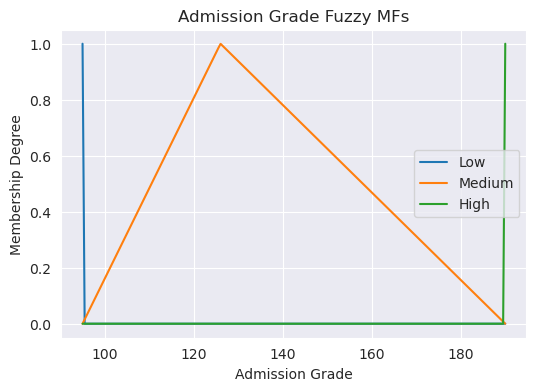

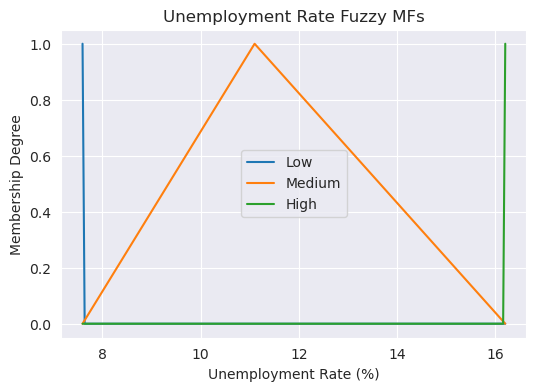

In [8]:
import matplotlib.pyplot as plt

# Plot membership functions for Admission grade
x_vals = np.linspace(X_train['Admission grade'].min(),
                     X_train['Admission grade'].max(), 200)
plt.figure(figsize=(6,4))
for label, (a, b, c) in fuzzy_params['Admission grade'].items():
    y_vals = triangular_mf(x_vals, a, b, c)
    plt.plot(x_vals, y_vals, label=label)
plt.title('Admission Grade Fuzzy MFs')
plt.xlabel('Admission Grade')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

# Plot membership functions for Unemployment rate
x_vals = np.linspace(X_train['Unemployment rate'].min(),
                     X_train['Unemployment rate'].max(), 200)
plt.figure(figsize=(6,4))
for label, (a, b, c) in fuzzy_params['Unemployment rate'].items():
    y_vals = triangular_mf(x_vals, a, b, c)
    plt.plot(x_vals, y_vals, label=label)
plt.title('Unemployment Rate Fuzzy MFs')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

In [9]:
# Rule extraction using the Wang–Mendel method

# We assume `fuzzy_X_train` contains fuzzified continuous features
# and `y_train` holds the true class labels for each sample.

rules = {}  # will map antecedent‐tuple → dict(consequent, strength)

for idx in X_train.index:
    # 1. For each continuous feature, pick the fuzzy label with highest membership
    antecedent_labels = []
    membership_values = []
    for feat in cont_features:
        # collect memberships for Low/Medium/High
        mfs = {
            label: fuzzy_X_train.loc[idx, f"{feat}_{label}"]
            for label in ['Low', 'Medium', 'High']
        }
        # select label with max membership
        best_label, best_mu = max(mfs.items(), key=lambda x: x[1])
        antecedent_labels.append((feat, best_label))
        membership_values.append(best_mu)

    # 2. Compute rule firing strength as the minimum membership (AND operator)
    strength = min(membership_values)

    # 3. Consequent is the true class of this instance
    consequent = y_train.loc[idx]

    # 4. Build a hashable key from the antecedent labels
    key = tuple(label for (_, label) in antecedent_labels)

    # 5. Keep only the rule with highest strength for each unique antecedent
    if key not in rules or strength > rules[key]['strength']:
        rules[key] = {
            'antecedent': antecedent_labels,
            'consequent': consequent,
            'strength': strength
        }

In [10]:
# Print the final rule base
print("Extracted Fuzzy Rules (Wang–Mendel):\n")
for rule in rules.values():
    ant_parts = [f"{feat} IS {label}" for feat, label in rule['antecedent']]
    ant_str = " AND ".join(ant_parts)
    print(f"IF {ant_str} THEN Target = {rule['consequent']}  "
          f"[weight = {rule['strength']:.3f}]")

Extracted Fuzzy Rules (Wang–Mendel):

IF Admission grade IS Medium AND Unemployment rate IS Medium THEN Target = Dropout  [weight = 0.998]
IF Admission grade IS Medium AND Unemployment rate IS Low THEN Target = Enrolled  [weight = 1.000]
IF Admission grade IS Medium AND Unemployment rate IS High THEN Target = Enrolled  [weight = 0.998]
IF Admission grade IS Low AND Unemployment rate IS Medium THEN Target = Enrolled  [weight = 1.000]
IF Admission grade IS High AND Unemployment rate IS High THEN Target = Graduate  [weight = 1.000]
IF Admission grade IS High AND Unemployment rate IS Medium THEN Target = Dropout  [weight = 1.000]


In [11]:
import numpy as np
import random
from copy import deepcopy

# List of all extracted rules
rules_list = list(rules.values())
num_rules = len(rules_list)

# Encode a subset of rules as a binary chromosome (length = num_rules)
def init_population(pop_size: int) -> np.ndarray:
    """
    Create initial population of binary chromosomes.
    Each chromosome is a vector of 0/1 indicating whether a rule is selected.
    """
    return np.random.randint(0, 2, size=(pop_size, num_rules))

def decode_chromosome(chrom: np.ndarray):
    """
    Given a binary chromosome, return the list of active rules.
    """
    return [rules_list[i] for i, bit in enumerate(chrom) if bit == 1]


In [12]:
def classify_with_rules(chrom: np.ndarray, X_fuzzy: pd.DataFrame):
    """
    Classify each sample by selecting the active rule
    with the highest firing strength.
    """
    active_rules = decode_chromosome(chrom)
    y_pred = []
    # Precompute antecedent feature names and labels for speed
    ant_feats = cont_features
    for idx in X_fuzzy.index:
        best = None
        best_strength = -1.0
        for rule in active_rules:
            # Compute firing strength: minimum membership among antecedent labels
            strength = min(
                X_fuzzy.loc[idx, f"{feat}_{label}"]
                for feat, label in rule['antecedent']
            )
            if strength > best_strength:
                best_strength, best = strength, rule['consequent']
        # If no rule fires, fallback to majority class
        y_pred.append(best if best is not None else y_train.mode()[0])
    return y_pred

def fitness(chrom: np.ndarray, X_fuzzy: pd.DataFrame, y_true: pd.Series,
            alpha: float = 0.01) -> float:
    """
    Fitness = classification accuracy - alpha * (number_of_rules / total_rules)
    """
    y_pred = classify_with_rules(chrom, X_fuzzy)
    accuracy = np.mean([pred == true for pred, true in zip(y_pred, y_true)])
    penalty = alpha * (chrom.sum() / num_rules)
    return accuracy - penalty


In [13]:
def tournament_selection(pop: np.ndarray, fits: np.ndarray, k: int = 3):
    """
    Select one parent via tournament of size k.
    """
    participants = np.random.choice(len(pop), size=k, replace=False)
    best_idx = participants[np.argmax(fits[participants])]
    return pop[best_idx]

def single_point_crossover(p1: np.ndarray, p2: np.ndarray):
    """
    Single-point crossover between two parents.
    """
    if len(p1) < 2 or random.random() > 0.9:
        return deepcopy(p1), deepcopy(p2)
    point = random.randint(1, len(p1) - 1)
    c1 = np.concatenate([p1[:point], p2[point:]])
    c2 = np.concatenate([p2[:point], p1[point:]])
    return c1, c2

def bit_flip_mutation(chrom: np.ndarray, mutation_rate: float = 0.02):
    """
    Flip bits with given probability.
    """
    for i in range(len(chrom)):
        if random.random() < mutation_rate:
            chrom[i] = 1 - chrom[i]
    return chrom

In [ ]:
# GA hyperparameters
POP_SIZE = 50
GENERATIONS = 5
ALPHA = 0.01

# Initialize population
population = init_population(POP_SIZE)

# Evaluate initial fitnesses
fitnesses = np.array([fitness(ind, fuzzy_X_train, y_train, ALPHA)
                      for ind in population])

for gen in range(GENERATIONS):
    new_pop = []
    # Elitism: carry best individual forward
    best_idx = np.argmax(fitnesses)
    new_pop.append(deepcopy(population[best_idx]))

    # Generate the rest of the new population
    while len(new_pop) < POP_SIZE:
        # Selection
        parent1 = tournament_selection(population, fitnesses)
        parent2 = tournament_selection(population, fitnesses)
        # Crossover
        child1, child2 = single_point_crossover(parent1, parent2)
        # Mutation
        new_pop.append(bit_flip_mutation(child1))
        if len(new_pop) < POP_SIZE:
            new_pop.append(bit_flip_mutation(child2))

    population = np.array(new_pop)
    fitnesses = np.array([fitness(ind, fuzzy_X_train, y_train, ALPHA)
                          for ind in population])

    # Report progress
    print(f"Generation {gen+1}: Best fitness = {fitnesses.max():.4f}, "
          f"Num rules = {population[np.argmax(fitnesses)].sum()}")

# Select final best chromosome
best_chrom = population[np.argmax(fitnesses)]
selected_rules = decode_chromosome(best_chrom)
print(f"\nSelected {len(selected_rules)} rules out of {num_rules}")

Generation 1: Best fitness = 0.3196, Num rules = 1
Generation 2: Best fitness = 0.3196, Num rules = 1


In [45]:
# Fuzzify test set using the same membership parameters from training
fuzzy_X_test = pd.DataFrame(index=X_test.index)
for feat, sets in fuzzy_params.items():
    for label, (a, b, c) in sets.items():
        col_name = f"{feat}_{label}"
        fuzzy_X_test[col_name] = triangular_mf(
            X_test[feat].values, a, b, c
        )

In [46]:
# Predict class labels on test set using the selected rules
y_test_pred = classify_with_rules(best_chrom, fuzzy_X_test)


In [47]:
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

# Compute performance metrics
accuracy  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall    = recall_score(y_test, y_test_pred, average='weighted')
f1        = f1_score(y_test, y_test_pred, average='weighted')
cm        = confusion_matrix(y_test, y_test_pred, labels=y.unique())

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)


Accuracy : 0.4994
Precision: 0.2494
Recall   : 0.4994
F1-score : 0.3327

Confusion Matrix:
[[  0 284   0]
 [  0 442   0]
 [  0 159   0]]


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
from imblearn.over_sampling import SMOTE

# Optional: balance training data with SMOTE before fuzzification
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Then repeat fuzzification and GA selection on the balanced dataset...

In [49]:
# Build a DataFrame of rule activation strengths for first 5 test samples
activation_df = pd.DataFrame(index=fuzzy_X_test.index[:5])

for i, rule in enumerate(selected_rules):
    col_name = f"Rule_{i+1}_strength"
    activation_df[col_name] = fuzzy_X_test.apply(
        lambda row: min(
            row[f"{feat}_{label}"]
            for feat, label in rule['antecedent']
        ),
        axis=1
    )

print("Rule activation strengths for first 5 test samples:")
print(activation_df)

Rule activation strengths for first 5 test samples:
Empty DataFrame
Columns: []
Index: [1853, 2399, 510, 242, 3392]


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# We will compare on two setups:
# A) Original numeric features
# B) Fuzzified features

# A) Original features: scale continuous columns
numeric_feats = ['Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP']
scaler = StandardScaler()
X_train_num = X_train.copy()
X_test_num  = X_test.copy()
X_train_num[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test_num[numeric_feats]  = scaler.transform(X_test[numeric_feats])

# B) Fuzzified features: use fuzzy_X_train and fuzzy_X_test
X_train_fuzzy = fuzzy_X_train.copy()
X_test_fuzzy  = fuzzy_X_test.copy()


In [51]:
# Decision Tree on original features
dt_orig = DecisionTreeClassifier(random_state=42)
dt_orig.fit(X_train_num, y_train)
y_dt_orig = dt_orig.predict(X_test_num)

# Decision Tree on fuzzified features
dt_fuzzy = DecisionTreeClassifier(random_state=42)
dt_fuzzy.fit(X_train_fuzzy, y_train)
y_dt_fuzzy = dt_fuzzy.predict(X_test_fuzzy)

# Compute and print metrics
for name, y_pred in [
    ("DT on Original", y_dt_orig),
    ("DT on Fuzzy",    y_dt_fuzzy)
]:
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1s = f1_score(y_test, y_pred, average='weighted')
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, "
          f"Recall={rec:.4f}, F1={f1s:.4f}")

DT on Original: Accuracy=0.6972, Precision=0.7019, Recall=0.6972, F1=0.6994
DT on Fuzzy: Accuracy=0.3932, Precision=0.4053, Recall=0.3932, F1=0.3964


In [ ]:
# SVM on original features
svm_orig = SVC(kernel='rbf', probability=True, random_state=42)
svm_orig.fit(X_train_num, y_train)
y_svm_orig = svm_orig.predict(X_test_num)

# SVM on fuzzified features
svm_fuzzy = SVC(kernel='rbf', probability=True, random_state=42)
svm_fuzzy.fit(X_train_fuzzy, y_train)
y_svm_fuzzy = svm_fuzzy.predict(X_test_fuzzy)

# Compute and print metrics
for name, y_pred in [
    ("SVM on Original", y_svm_orig),
    ("SVM on Fuzzy",    y_svm_fuzzy)
]:
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1s = f1_score(y_test, y_pred, average='weighted')
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, "
          f"Recall={rec:.4f}, F1={f1s:.4f}")

In [1]:
import ipywidgets as widgets
from IPython.display import display

# Create sliders/text inputs for two continuous features
grade_slider = widgets.FloatSlider(
    value=X_test['Admission grade'].mean(),
    min=X_test['Admission grade'].min(),
    max=X_test['Admission grade'].max(),
    step=0.1,
    description='Admission Grade:'
)
unemp_slider = widgets.FloatSlider(
    value=X_test['Unemployment rate'].mean(),
    min=X_test['Unemployment rate'].min(),
    max=X_test['Unemployment rate'].max(),
    step=0.1,
    description='Unemployment Rate:'
)
output = widgets.Output()

def infer(grade, unemp):
    # Fuzzify inputs
    mu_grade = {label: triangular_mf(
        np.array([grade]), *params
    )[0] for label, params in fuzzy_params['Admission grade'].items()}
    mu_unemp = {label: triangular_mf(
        np.array([unemp]), *params
    )[0] for label, params in fuzzy_params['Unemployment rate'].items()}

    # Compute firing strengths for selected rules
    strengths = []
    for rule in selected_rules:
        mu1 = mu_grade[rule['antecedent'][0][1]]
        mu2 = mu_unemp[rule['antecedent'][1][1]]
        strengths.append((min(mu1, mu2), rule['consequent']))

    # Pick rule with max strength
    best_strength, best_consequent = max(strengths, key=lambda x: x[0])

    with output:
        output.clear_output()
        print(f"Predicted class: {best_consequent}")
        print(f"Firing strength: {best_strength:.3f}")
        print("\nAll rule strengths:")
        for idx, (s, c) in enumerate(strengths, 1):
            print(f"Rule {idx}: strength={s:.3f}, consequent={c}")

# Link sliders to inference
widgets.interact(
    infer,
    grade=grade_slider,
    unemp=unemp_slider
)
display(output)


NameError: name 'X_test' is not defined